<a href="https://colab.research.google.com/github/AnishPawar/DSC-Eye-of-God/blob/flaskLatencyFix/Stage-2/Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/DSC_Eye_Of_God/Testing_Backend/Cloud_Backend'

/content/drive/MyDrive/DSC_Eye_Of_God/Testing_Backend/Cloud_Backend


In [4]:
!pip install flask-ngrok

In [5]:
from tensorflow import keras
from keras.models import load_model
from layers import BilinearUpSampling2D
from utils import predict, display_images
from my_utils import load_cv
from  load_model import load_model_depth
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '10'
import numpy as np

In [6]:
from google.colab.patches import cv2_imshow

In [7]:
def isClose(x,y,w,h,img):
  height, width = img.shape[:2]
  initThresh = 1000000
  ul = (x, y)
  lr = (x+w, y+h)

  if int(x+w/2) in range(0, int(width/4)):
      impart = 1
  elif int(x+w/2) in range(int(width/4), 2*int(width/4)):
      impart = 2
  elif int(x+w/2) in range(2*int(width/4), 3*int(width/4)):
      impart =3 
  elif int(x+w/2) in range(3*int(width/4), 4*int(width/4)):
      impart = 4 

  roi = img[ul[0]:lr[0], ul[1]:lr[1]]
  histogram = roi.ravel()

  if np.mean(histogram) < initThresh:
      initThresh = np.mean(histogram)
      fimpart = impart

  if initThresh <= 120:
    
    print("initThresh is alive")
    mappedOutput = 0.02*initThresh**2 - 3.55*initThresh + 300

    # whatToPush['testing.png'] = [fimpart, int(mappedOutput), fclass]
    # with open("test_json_files/push.json", "w") as outfile: 
    #     json.dump(whatToPush, outfile)

    return [fimpart, int(mappedOutput)]
  return [fimpart, 0]

In [8]:
from  load_model import load_model_depth
depthModel = load_model_depth()

Loading model...

Model loaded (nyu.h5).


In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js

In [10]:
from utils import predict, display_images

def depthMap(depthModel,img):
  outputs = predict(depthModel, img)
  print("Visualising")
  viz = display_images(outputs.copy(), img.copy())
  viz = np.flip(viz,0)
  cv2.imwrite("/content/drive/MyDrive/DSC_Eye_Of_God/Testing_Backend/Cloud_Backend/test_json_files/gg.jpg",viz)
  cv2_imshow(viz)
  return viz

In [14]:
def dataExtractor(request):
  allx = str(request.form['x'])
  ally = str(request.form['y'])
  allw = str(request.form['w'])
  allh = str(request.form['h'])
  allclasses = str(request.form['dClass'])

  allclasses = allclasses.split(',')
  allclasses.pop()
  allx = allx.split(',')
  allx.pop()
  ally = ally.split(',')
  ally.pop()
  allw = allw.split(',')
  allw.pop()
  allh = allh.split(',')
  allh.pop()

  mpClasses = [
  "bicycle",
  "car",
  "motorcycle",
  "airplane",
  "bus",
  "train",
  "person",
  "truck",
  "boat",
  "traffic light",
  "stop sign",
  "bench",
  "potted plant"
  "laptop",
  "cell phone",
  "tv"
  ]
  i = 0
  templist = []
  for object1 in allclasses:
      if object1 in mpClasses:
          templist.append({object1:[allx[i],ally[i],allw[i],allh[i]]})
          print(object1)
          i+=1
  return templist

In [11]:
import time
from flask import Flask,request,jsonify
import cv2
from numpy.core.fromnumeric import argmax
from werkzeug.datastructures import ImmutableMultiDict
import numpy as np
# from test_img import detect
import os
import io
import base64
import PIL.Image as Image

from PIL import ImageFile
import json
from io import BytesIO

In [12]:
def noObjectDepth(quadNumber, depthImage):
  height, width = depthImage.shape[:2]
  initThresh = 1000000
  roi = depthImage[(quadNumber-1)*int(width/4): (quadNumber)*int(width/4), :]
  histogram = roi.ravel()
  if np.mean(histogram) < initThresh:
      initThresh = np.mean(histogram)

  if initThresh <= 120:
    print("initThresh is alive")
    mappedOutput = 0.02*initThresh**2 - 3.55*initThresh + 300


    return int(mappedOutput)

  return 0

In [ ]:
import numpy as np
retdata = {1:[[123, 34, 56],["chair", "door", "car"]],2:[[], []],3:[[12], ["cycle"]],4:[[123, 34, 56],["chair", "door", "car"]]}

for i in range(1,5):
  if not (len(retdata[i][0])==0):
    minData = max(retdata[i][0])
    minIndex = retdata[i][0].index(minData)
    retdata[i]= [minData, retdata[i][1][minIndex]]
print(retdata)

{1: [123, 'chair'], 2: [[], []], 3: [12, 'cycle'], 4: [123, 'chair']}


In [ ]:
retdata = {1:[[],[]],2:[[],[]],3:[[],[]],4:[[],[]]}

curr = [1, 34]
retdata[curr[0]][0].append(curr[1])
retdata[curr[0]][1].append("car")
print(retdata)

{1: [[34], ['car']], 2: [[], []], 3: [[], []], 4: [[], []]}


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://489577d6f9b7.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [02/Jun/2021 16:05:05] "GET / HTTP/1.1" 405 -


ImmutableMultiDict([('x', ''), ('y', ''), ('w', ''), ('h', ''), ('dClass', ''), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAABAMCP8PCwf/DgoI/w4KCP8NCQf/DgoI/w4KCP8OCgj/DgoI/wwIBv8GAwP/BQIC/wYDA/8GAwP/BgMD/wYDA/8GAwP/BgMD/wYDA/8GAwP/BgMD/wUCAv8GAwX/BQIE/wYDA/8GAwP/BgMD/wYDA/8GAwX/BQIE/wUCBP8FAgT/BQIE/wUCBP8FAgT/BQIE/wUCBP8FAgT/BQIE/wUCBP8FAgT/BQIE/wUCBP8FAgT/BQIE/wYDBf8GAwP/BgMD/wcEBv8IBQf/CAUF/wgFBf8JBQX/CQUF/wkFBf8OCgr/EQsK/xELCv8QCgn/EQsK/xQMCf8UDAn/FAwL/xQMC/8UDAv/FQ0M/xUNDP8VDQz/Ew0M/xMNDP8TDQz/Ew0M/xQODf8UDg3/AwAA/wMAAP9EPUb/fXZ//4OEl/9NTmH/ISkz/yMrNf8dIjX/MDVI/yYrR/8iJ0P/HyRA/yInQ/8fJkH/Ehk0/w8WMf8OFTD/Fh42/yIqQv8uNk7/OkJa/0JMZP9FT2f/Qk5l/0BMY/9BS2P/P0lh/2lwgv/W3e//+v////r//////f////3////9/////f///f7///3+///H3v//XnWW/x4uT/8OHj//Excz/w8TL/8MFCz/CxMr/wkPJv8HDST/CAoi/wcJIf8GCRv/BQga/wUJFv8CBhP/AQUQ/wMHEv8FDBb/AwoU/wcJFP8JCxb/DA4Z/w0PGv8TExz/FBQd/xkZIv8fHyj/ISEq/ycnMP8rLjb/Ky42/yotNf8rLjb/Ly84/zExOv8xMTr/MjI7/zI1Pf8xNDz/MTQ8/zE0PP8zMzz/MzM8/zMzPP8xMTr

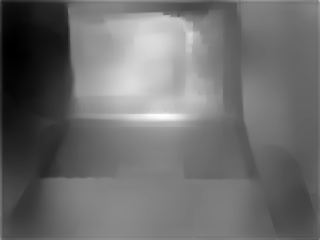

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
127.0.0.1 - - [02/Jun/2021 16:05:28] "POST / HTTP/1.1" 200 -



[]
initThresh is alive
initThresh is alive
initThresh is alive
{1: [154, ''], 2: [152, ''], 3: [147, ''], 4: [0, '']}
ImmutableMultiDict([('x', ''), ('y', ''), ('w', ''), ('h', ''), ('dClass', ''), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAoFCP8KBQj/CAUH/wgFB/8IBQf/CQYI/wsFCP8MBgn/DAYJ/wsFCP8TCgz/Fg0P/xgQD/8aEhH/FhEK/xINBv8LBwf/CgYG/wkEB/8KBQj/CwcH/woGBv8JBgj/CQYI/wkGCP8JBgj/CQYI/wkGCP8KBwn/DAkL/w4LC/8PDAz/EA0N/xANDf8QDgv/EA4L/xAOC/8PDQr/DgsL/w4LC/8NCgr/CwgI/woHCf8JBgj/CQYI/wkGCP8JBgj/CQYI/wkGCP8JBgj/CQYI/wkGCP8JBgj/CQYI/wkGBv8JBgb/CQYI/wkGCP8KBQj/CgUI/wgFBf8JBgb/CAUH/wkGCP8JBgb/CAUF/wwICP8NCQn/EAoJ/xAKCf8PCQj/FA4N/xcSDv8WEQ3/EQ0L/w0JB/8NCQf/DgoI/w4KCP8NCQf/CQYG/wgFBf8HBAT/CQYG/wkGBv8JBgb/BwcG/wcHBv8JBgb/CQYG/wkGBv8JBgb/CAUF/wgFBf8IBQX/CAUF/wkFBf8KBgb/CgYG/wsHB/8NBwb/DQcG/w4IB/8NBwb/CwcH/w8LC/8QCAT/EgoG/zwyGP9KQCb/Pzcc/z42G/89NB7/SD8p/05DL/9JPir/WE8y/0Y9IP9ANhz/Qjge/0Y8Iv9ANhz/GQwA/zksG/9OMhb/TjIW/0krCv9eQB//ZUYd/2FCGf9iQxr/YkMa/2RDG/9kQxv/ZkUb/2ZF

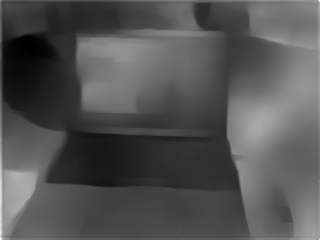

127.0.0.1 - - [02/Jun/2021 16:05:29] "POST / HTTP/1.1" 200 -



[]
initThresh is alive
initThresh is alive
initThresh is alive
{1: [142, ''], 2: [143, ''], 3: [142, ''], 4: [0, '']}
ImmutableMultiDict([('x', '17.66855478286743,'), ('y', '4.6605682373046875,'), ('w', '210.3647232055664,'), ('h', '289.4944381713867,'), ('dClass', 'laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAgFB/8IBQf/CQYI/wkGCP8IBQf/CQYI/woGBv8LBwf/DAgI/xAMDP8RDQ3/FBAQ/xcPDv8XDw7/DQoK/wkGBv8IBQX/CQYG/wkGCP8JBgj/CQYI/wkGCP8HBwj/BwcI/wkGCP8JBgj/CQYI/woHCf8MCQv/DQoM/w4LC/8PDAz/DwwM/w8MDP8QDAz/EAwM/xAMDP8QDAz/DwsL/w8LC/8MBwr/CwYJ/wsGCf8LBgn/CwYJ/woFCP8KBQj/CwYJ/wsGCf8KBQj/CQYI/wkGCP8JBgj/CAUH/wkGCP8JBgj/CQYI/wkGCP8JBgb/CQYG/wkGBv8KBwf/CgcH/woHB/8MCAj/DAgI/w4ICf8QCgv/EAoJ/xIMC/8VEAz/FhEN/xgSEf8TDQz/DQkH/wwIBv8MCAj/DwsL/w4KCv8NCQn/DAgI/wsHB/8LBwf/CgYG/wkGBv8JBgb/CgYG/woGBv8JBgb/CQYG/wkGBv8IBQX/CAUF/wkGBv8KBgb/CgYG/wkGBv8KBwf/CgcH/woHB/8MCAb/DAgG/wsHBf8KBgT/EQkG/xMLCP8SCgD/Mysg/0I8I/87NRz/OTQe/zcyHP88NiD/S0Uv/0lFK/9eWkD/R0Mn/zk1Gf88Nxv/Pzoe/zg2

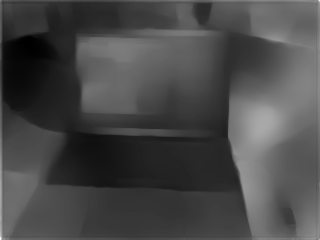

127.0.0.1 - - [02/Jun/2021 16:05:30] "POST / HTTP/1.1" 200 -


17.66855478286743,
[['laptop', '17.66855478286743', '4.6605682373046875', '210.3647232055664', '289.4944381713867']]
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [146, ''], 2: [150, 'laptop'], 3: [148, ''], 4: [0, '']}
ImmutableMultiDict([('x', '23.895978927612305,'), ('y', '10.075063705444336,'), ('w', '190.7131576538086,'), ('h', '279.5793151855469,'), ('dClass', 'laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAsGCf8KBQj/CQYI/wkGCP8KBQj/CgUI/wkGCP8JBgj/BwQG/wgFB/8MCAj/DwsL/xQOD/8WEBH/FhAP/xUPDv8RDQ3/CwcH/wgFB/8HBAb/BgYH/wcHCP8GBgf/BgYH/wgFB/8IBQf/CAUH/wkGCP8JBgj/CQYI/wkGBv8MCQn/DgsL/w8MDP8QDAz/EAwM/w8LC/8PCwv/DQoK/w0KCv8OCgr/DAgI/wsGCf8LBgn/CgcJ/woHCf8LBgn/CwYJ/wkGCP8JBgj/CQYI/wkGCP8JBgj/CQYI/woFCP8LBgn/CgcJ/wkGCP8JBgb/CQYG/wkGBv8KBwf/CQYG/woHB/8KBwf/CgcH/wsICP8LCAj/DQgL/w0IC/8NCQf/EQ0L/xgQDP8YEAz/EQ8K/xAOCf8OCgj/Ew8N/xgWE/8YFhP/Eg4O/wsHB/8IBQX/BwQE/wkGBv8JBgb/CQcE/wkHBP8JBgb/CQYG/wkGBv8JBgb/CAUF/wgFBf8HBAT/BwQE/wkGB

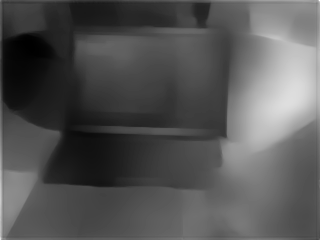

127.0.0.1 - - [02/Jun/2021 16:05:32] "POST / HTTP/1.1" 200 -


23.895978927612305,
[['laptop', '23.895978927612305', '10.075063705444336', '190.7131576538086', '279.5793151855469']]
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [143, ''], 2: [144, 'laptop'], 3: [142, ''], 4: [0, '']}
ImmutableMultiDict([('x', '22.88400650024414,46.592702865600586,'), ('y', '33.26120376586914,122.00556755065918,'), ('w', '179.02906894683838,125.93263149261475,'), ('h', '262.4508285522461,173.30276489257812,'), ('dClass', 'laptop,laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAcHBv8GBgX/BgYF/wYGBf8GBgf/BgYH/wYGB/8HBwj/CQYG/wkGBv8NCQf/Eg4M/xQQDv8UEA7/FBAM/xIOCv8KBwf/CAUF/wgFB/8IBQf/BgYF/wYGBf8GBgf/BgYH/wYGBf8GBgX/BgYH/wYGB/8HBwj/CAgJ/woHCf8NCgz/DgsL/w8MDP8PDQr/Dw0K/w4LC/8OCwv/DQoK/wwJCf8LCAj/CgcH/wkGBv8JBgb/CQYG/woHB/8KBwf/CgcH/wkGBv8JBgb/CQYG/wkGBv8JBgj/CQYI/wkGCP8JBgj/CQYI/wgFB/8JBgb/CQYG/wkGCP8JBgj/CgYG/wsHB/8MBwr/DAcK/w0JCf8OCgr/DgoK/w0JCf8RCwr/FxEQ/xgSEf8VDw7/DwsJ/w0JB/8NCQn/EAwM/xAOC/8PDQr/DAkJ/

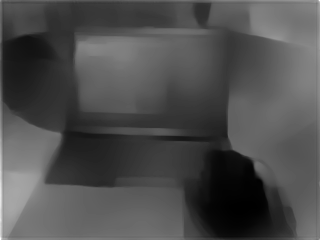

127.0.0.1 - - [02/Jun/2021 16:05:33] "POST / HTTP/1.1" 200 -


22.88400650024414,46.592702865600586,
[['laptop', '22.88400650024414', '33.26120376586914', '179.02906894683838', '262.4508285522461'], ['laptop', '46.592702865600586', '122.00556755065918', '125.93263149261475', '173.30276489257812']]
laptop
initThresh is alive
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [142, ''], 2: [147, 'laptop'], 3: [145, ''], 4: [0, '']}
ImmutableMultiDict([('x', '20.175297260284424,'), ('y', '29.605731964111328,'), ('w', '176.22164726257324,'), ('h', '262.4508285522461,'), ('dClass', 'laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAgFB/8HBAb/CAUH/wcEBv8HBAT/BwQE/wkFBf8KBgb/CgYG/wsHB/8NCgr/DwwM/xAOC/8RDwz/EAwM/wwICP8JBAf/CAMG/wcEBv8HBAb/BwQG/wgFB/8IBQX/CAUF/wcEBv8HBAb/BwQG/wcEBv8IBQX/CQYG/wsICP8MCQn/DAkJ/wsICP8LCAr/CwgK/wsICP8KBwf/CgcH/woHB/8JBgb/CAUF/wcEBv8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFBf8JBgb/CQYG/wkGBv8JBgb/CgcH/wwICP8MCAj/DAgI/w

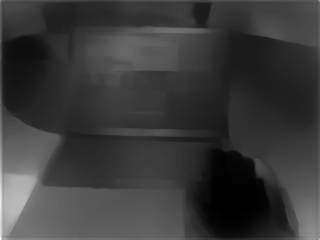

127.0.0.1 - - [02/Jun/2021 16:05:34] "POST / HTTP/1.1" 200 -


20.175297260284424,
[['laptop', '20.175297260284424', '29.605731964111328', '176.22164726257324', '262.4508285522461']]
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [165, ''], 2: [170, 'laptop'], 3: [148, ''], 4: [0, '']}
ImmutableMultiDict([('x', '18.716325759887695,'), ('y', '25.687427520751953,'), ('w', '181.8812084197998,'), ('h', '266.63196563720703,'), ('dClass', 'laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAgFCf8HBAj/BwQG/wcEBv8FBQb/BQUG/wcEBv8HBAb/BwQE/wcEBP8MCQn/EA0N/xENDf8SDg7/DgsL/wsICP8HBAT/CAUF/wYGB/8FBQb/BQUG/wUFBv8FBQb/BQUG/wUFBv8GBgf/BgYH/wcHCP8KBwn/CwgK/wsICP8NCgr/DQoM/w0KDP8OCgr/DgoK/w0KDP8NCgz/DgoK/w0JCf8KBwn/CQYI/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CAUH/wgFB/8IBQf/CQYI/wkGCP8KBwf/CgcH/woHB/8LCAj/DAgI/wwICP8NCgr/EQ4O/xIODv8QDAz/CwgI/woHB/8LCAj/DAkJ/wsICv8KBwn/CQYI/wkGCP8GBgf/BgYH/wYGB/8GBgf/BgYH/wYGB/8IBQf/CAUH/wUFBv8FBQb/BQUG/wUFBv8FBQb/BQUG/

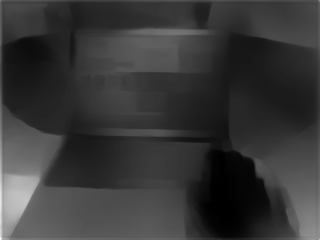

127.0.0.1 - - [02/Jun/2021 16:05:35] "POST / HTTP/1.1" 200 -


18.716325759887695,
[['laptop', '18.716325759887695', '25.687427520751953', '181.8812084197998', '266.63196563720703']]
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [168, ''], 2: [174, 'laptop'], 3: [150, ''], 4: [0, '']}
ImmutableMultiDict([('x', '50.585739612579346,'), ('y', '125.33697128295898,'), ('w', '120.10067939758301,'), ('h', '155.1513671875,'), ('dClass', 'laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAgFB/8IBQf/CAUH/wgFB/8IBQX/CAUF/wkGBv8KBwf/DgoI/w4KCP8SDgz/FxMR/xcSDv8XEg7/Ew8N/w0JB/8KBQj/CQQH/wkGCP8JBgj/CQYI/wkGCP8JBgj/CQYI/wkGCP8JBgj/BwcI/wcHCP8HBwj/CQkK/woKC/8MDA3/DQ0M/w0NDP8NDQz/DQ0M/w8MDP8PDAz/DwwM/wwJCf8KBwf/CQYG/wcHBv8HBwb/CQYI/wkGCP8HBwj/BwcI/woHCf8KBwn/CgcJ/woHCf8KBwn/CQYI/wkGBv8JBgb/CQYI/woHCf8JBgb/CgcH/wkGCP8KBwn/CwYJ/wwHCv8MCAj/DQkJ/w4KCv8PCwv/DwsL/xENDf8WEA//GRMS/xURD/8RDQv/DQkJ/w8LC/8QDQ3/EA0N/xAND/8NCgz/CQYI/wkGCP8KBwn/CgcJ/wkGCP8JBgj/CAUF/wgFBf8IBQX/CAUF/wkGBv8IBQX/CQYG/wkGBv8JBgb/CgcH/woH

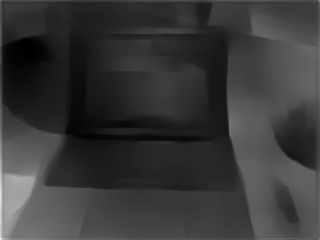

127.0.0.1 - - [02/Jun/2021 16:05:37] "POST / HTTP/1.1" 200 -


50.585739612579346,
[['laptop', '50.585739612579346', '125.33697128295898', '120.10067939758301', '155.1513671875']]
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [175, ''], 2: [169, 'laptop'], 3: [146, ''], 4: [0, '']}
ImmutableMultiDict([('x', '48.30965995788574,'), ('y', '124.65764045715332,'), ('w', '121.15239143371582,'), ('h', '156.5100383758545,'), ('dClass', 'tv,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAoFCP8KBQj/CAUF/wgFBf8IBQX/CQYG/wkGBv8JBgb/CQUD/woGBP8PCwn/Ew8N/xQQDv8UEA7/FBIP/w0LCP8HBAT/BwQE/wYGB/8GBgf/BgYH/wYGB/8GBgX/BgYF/wYGBf8GBgX/CAUH/wkGCP8HBwb/BwcG/wsICP8NCgr/DgsL/w4LC/8NCgr/DQoK/w0KDP8MCQv/DAkL/wsICv8JBgb/CQYG/wkGCP8JBgj/CQYI/wkGCP8JBgj/CQYI/wkGBv8JBgb/CQYG/wkGBv8JBgb/CQYG/wkGBv8IBQX/CAUF/wkGBv8JBgj/CQYI/wkGCP8JBgj/CQYI/wsICv8MBwr/DQgL/w0IC/8OCQz/DQkJ/w8LC/8TDw3/FREP/xMRDv8PDQr/CgcH/wsICP8OCwv/EA0N/xIPD/8NCgr/CQYG/wgFBf8IBQX/CAUF/wgFBf8IBQX/CAUF/wgFBf8IBQX/CAUF/wgFBf8IBQX/CQYG/wkGBv8JBgb/CAUF/wgFBf8IB

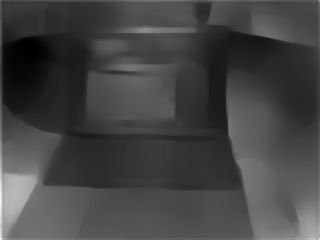

127.0.0.1 - - [02/Jun/2021 16:05:37] "POST / HTTP/1.1" 200 -


48.30965995788574,
[['tv', '48.30965995788574', '124.65764045715332', '121.15239143371582', '156.5100383758545']]
tv
initThresh is alive
initThresh is alive
initThresh is alive
{1: [164, ''], 2: [155, 'tv'], 3: [142, ''], 4: [0, '']}
ImmutableMultiDict([('x', '17.16646671295166,44.438581466674805,'), ('y', '10.43940544128418,107.74532318115234,'), ('w', '187.72253036499023,125.93263149261475,'), ('h', '275.1951217651367,181.71817779541016,'), ('dClass', 'laptop,laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAgFBf8HBAT/BQUE/wUFBP8GBgX/BgYF/wYGBf8HBwb/BgYF/wYGBf8ODAn/EhAN/xIQDf8UEg//FBAO/wsHBf8GAwP/BwQE/wgFB/8IBQf/CAUF/wgFBf8GBgf/BgYH/wgFB/8IBQf/CAUH/wgFB/8JBgb/CgcH/w0KCv8NCgr/Dw0K/w8NCv8PCwv/DwsL/wsLCv8JCQj/CwkG/wsJBv8KBwf/CgcH/wkGBv8JBgb/CQYG/wkGBv8HBwb/BwcG/wcHBv8GBgX/BgYF/wYGBf8GBgX/BgYF/wYGBf8GBgX/BgYF/wYGBf8IBQX/CAUF/wkGBv8JBgb/CQYG/woHB/8KBwf/CwgI/w0JCf8NCQn/DAgG/w0JB/8RDQv/Ew8N/xMRDv8PDQr/CwkG/wsJBv8ODAn/EA4L/w8NCv8MCgf/CQYG/wkGBv8JBgb/CA

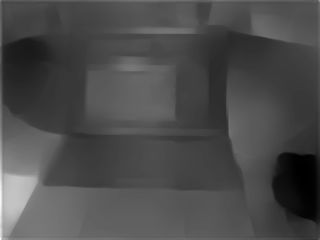

127.0.0.1 - - [02/Jun/2021 16:05:39] "POST / HTTP/1.1" 200 -


17.16646671295166,44.438581466674805,
[['laptop', '17.16646671295166', '10.43940544128418', '187.72253036499023', '275.1951217651367'], ['laptop', '44.438581466674805', '107.74532318115234', '125.93263149261475', '181.71817779541016']]
laptop
initThresh is alive
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [149, ''], 2: [147, 'laptop'], 3: [142, ''], 4: [0, '']}
ImmutableMultiDict([('x', '24.47439193725586,'), ('y', '15.284156799316406,'), ('w', '174.72227096557617,'), ('h', '264.36330795288086,'), ('dClass', 'laptop,'), ('Counter', 'iVBORw0KGgoAAAANSUhEUgAAAUAAAADwCAYAAABxLb1rAASxI0lEQVR4AQD7/wQAAAkGBv8JBgb/CAUF/wgFBf8JBQX/CgYG/woGBv8KBgb/CQYG/wkGBv8OCAf/Ew0M/xcSDv8XEg7/FREN/xAMCP8LBwf/CAQE/wcEBv8IBQf/CQYI/wkGCP8JBgj/CAUH/wkGCP8JBgj/CQYI/wgFB/8JBgj/CQYI/wsICP8MCQn/DQoK/w0KCv8OCgr/DgoK/wwJCf8MCQn/DQkJ/w0JCf8JBgb/CQYG/wkGBv8IBQX/CAUH/wgFB/8IBQf/CAUH/wkGBv8JBgb/CQYG/wgFBf8IBQX/CAUF/wgFBf8IBQX/CAUF/wgFBf8IBQX/CAUF/woGBv8KBgb/CgYG/wsHB/8MCAj/DAgI/wwICP8NCQn/DgoI/w

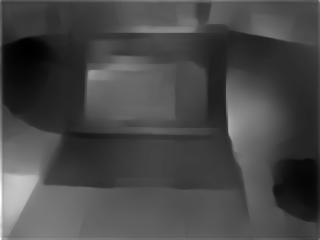

127.0.0.1 - - [02/Jun/2021 16:05:40] "POST / HTTP/1.1" 200 -


24.47439193725586,
[['laptop', '24.47439193725586', '15.284156799316406', '174.72227096557617', '264.36330795288086']]
laptop
initThresh is alive
initThresh is alive
initThresh is alive
{1: [155, ''], 2: [150, 'laptop'], 3: [142, ''], 4: [0, '']}


127.0.0.1 - - [02/Jun/2021 16:05:46] "POST / HTTP/1.1" 400 -


In [19]:
from flask_ngrok import run_with_ngrok
from flask import Flask,request,jsonify
app = Flask(__name__)
run_with_ngrok(app)
@app.route('/',methods=['POST'])

def outdoorBack():
    data = request.form
    print(data)
    im = Image.open(BytesIO(base64.b64decode(data['Counter'])))

    im.save("received_images/testing.png")
    
    # receivedImage = cv2.imread("received_images/testing.png")
    # print(receivedImage)
    receivedImage = load_cv("received_images/testing.png")
    if receivedImage is not None:
      depthImage = depthMap(depthModel,receivedImage)

      # imgData = dataExtractor(request)
      # print("printing imgData")
      # print(imgData)
      allx = str(request.form['x'])
      print(allx)
      ally = str(request.form['y'])
      allw = str(request.form['w'])
      allh = str(request.form['h'])
      allclasses = str(request.form['dClass'])

      allclasses = allclasses.split(',')
      allclasses.pop()
      allx = allx.split(',')
      allx.pop()
      ally = ally.split(',')
      ally.pop()
      allw = allw.split(',')
      allw.pop()
      allh = allh.split(',')
      allh.pop()

      mpClasses = [
      "bicycle",
      "car",
      "motorcycle",
      "airplane",
      "bus",
      "train",
      "person",
      "truck",
      "boat",
      "traffic light",
      "stop sign",
      "bench",
      "potted plant",
      "laptop",
      "cell phone",
      "tv"
      ]
      i = 0
      templist = []
      for object1 in allclasses:
        if object1 in mpClasses:
          templist.append([object1,allx[i],ally[i],allw[i],allh[i]])
        else:
          templist.append(["",allx[i],ally[i],allw[i],allh[i]])
        i+=1
      retdata = {1:[[],[]],2:[[],[]],3:[[],[]],4:[[],[]]}
      
      print(templist)
      
      for element in templist:
        cls = element[0]
        x = int(float(element[1]))
        y = int(float(element[2]))
        w = int(float(element[3]))
        h = int(float(element[4]))
        print(cls)
        currentObjOP = isClose(x, y, w, h, depthImage)
        retdata[currentObjOP[0]][0].append(currentObjOP[1])
        retdata[currentObjOP[0]][1].append(cls)

      
      for i in range(1,5):
        if len(retdata[i][0])==0:
          depth = noObjectDepth(i, depthImage)
          retdata[i][0].append(depth)
          retdata[i][1].append("")

      for i in range(1,5):
        if not (len(retdata[i][0])==0):
          minData = max(retdata[i][0])
          minIndex = retdata[i][0].index(minData)
          retdata[i]= [minData, retdata[i][1][minIndex]]

        

      # if 'push.json' in os.listdir("test_json_files"):
      #     with open("test_json_files/push.json") as outfile: 
      #         obj = json.load(outfile)
      #     fin = list(obj.values())

          # return_string = '{}:{}:{}'.format(fin[0],fin[1],fin[2])
          # print(return_string)
          # os.remove("test_json_files/push.json")
          # return return_string

      print(retdata)
      return jsonify(retdata)

    return "OK"

app.run()

In [ ]:
# receivedImage = cv2.imread("received_images/testing.png")
inputs = load_cv("received_images/testing.png")
depthImage = depthMap(depthModel,inputs)